# Análise dos dados - NBA em python

### import de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

from IPython.display import display, Markdown


### Import de dados

In [2]:
games_df = pd.read_csv("../dataset/games.csv")
games_details_df = pd.read_csv("../dataset/games_details.csv")
players_df = pd.read_csv("../dataset/players.csv")
ranking_df = pd.read_csv("../dataset/ranking.csv")
teams_df = pd.read_csv("../dataset/teams.csv")

In [42]:
ranking = ranking_df[['TEAM_ID','CONFERENCE']]
rank = ranking.rename(columns={'TEAM_ID':'HOME_TEAM_ID'}).drop_duplicates()
rank
games_df.merge(rank, left_on='HOME_TEAM_ID', right_on='HOME_TEAM_ID')
games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
24191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
24192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
24193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [41]:
rank[rank['HOME_TEAM_ID'] == 1610612737]

,HOME_TEAM_ID,CONFERENCE
138,1610612737,East


In [13]:
games_summary = games_df[['GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID','HOME_TEAM_WINS']]
games_summary

games_details_df.join(games_summary, lsuffix='_caller', rsuffix='_other')
games_details_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NaN,41:45,5.0,...,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0
1,22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NaN,35:06,5.0,...,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0
2,22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NaN,29:58,4.0,...,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0
3,22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NaN,34:42,5.0,...,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0
4,22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NaN,40:35,4.0,...,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602762,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
602763,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
602764,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
602765,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,19,1.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [6]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1


In [10]:
games_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NaN,41:45,5.0,...,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0
1,22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NaN,35:06,5.0,...,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0
2,22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NaN,29:58,4.0,...,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0
3,22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NaN,34:42,5.0,...,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0
4,22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NaN,40:35,4.0,...,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0


In [11]:
players_df.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [13]:
teams_df.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


### Delimitando escopo para Lakers

 - TEAM_ID para Lakers: 1610612747
 - PLAYER_ID do LeBron: 2544

In [17]:
teams_df[teams_df['TEAM_ID'] == 1610612747]

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers


### Tabela resumo do ranking do Lakers ao longo dos anos

In [149]:
ranking_df[ranking_df['TEAM_ID'] == 1610612747].describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,6.382000e+03,6382.0,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,0.0
mean,1.610613e+09,0.0,21392.284080,56.832498,30.315732,26.516766,0.528368,NaN
std,0.000000e+00,0.0,2409.792124,28.627569,18.474796,18.040629,0.210052,NaN
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.610613e+09,0.0,22006.000000,32.000000,16.000000,12.000000,0.385000,NaN
50%,1.610613e+09,0.0,22010.000000,68.000000,30.000000,25.000000,0.549000,NaN
75%,1.610613e+09,0.0,22015.000000,82.000000,45.000000,40.000000,0.695000,NaN
max,1.610613e+09,0.0,22020.000000,82.000000,65.000000,65.000000,1.000000,NaN


### Lakers como mandante

In [167]:
lakers_home_df = games_df[games_df['HOME_TEAM_ID'] == 1610612747]
lakers_visitor_df = games_df[games_df['VISITOR_TEAM_ID'] == 1610612747]
df_aux = [lakers_home_df, lakers_visitor_df]

lakers_games = pd.concat(df_aux)
lakers_home_df[['PTS_home','PTS_away','HOME_TEAM_WINS']].describe()

,PTS_home,PTS_away,HOME_TEAM_WINS
count,883.000000,883.000000,891.000000
mean,103.951302,100.826727,0.601571
std,12.424507,13.073076,0.489850
min,71.000000,57.000000,0.000000
25%,95.000000,92.000000,0.000000
50%,104.000000,101.000000,1.000000
75%,112.000000,109.000000,1.000000
max,142.000000,147.000000,1.000000


### Times mais derrotados pelas Lakers em Los Angeles

<AxesSubplot:xlabel='NICKNAME'>

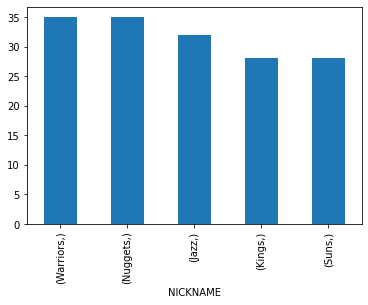

In [191]:
lakers_home_df_join = lakers_home_df.join(teams_df.set_index('TEAM_ID'), on='VISITOR_TEAM_ID')
lakers_home_df_join.insert(1, "HOME_TEAM", 'LAKERS')
lakers_home = lakers_home_df_join[['HOME_TEAM_ID','HOME_TEAM','NICKNAME','HOME_TEAM_WINS']]
home_win_filter = lakers_home['HOME_TEAM_WINS'] == 1
lakers_home[['NICKNAME']][home_win_filter].value_counts().head().plot.bar()

### Times que mais derrotaram os Lakers em Los Angeles

<AxesSubplot:xlabel='NICKNAME'>

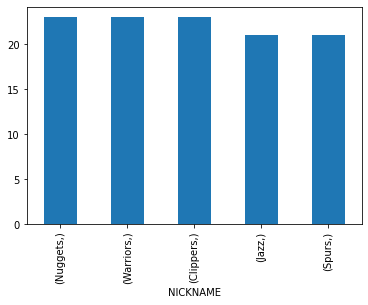

In [192]:
home_win_filter = lakers_home['HOME_TEAM_WINS'] == 0
lakers_home[['NICKNAME']][home_win_filter].value_counts().head().plot.bar()

### Lakers como visitante

In [168]:
lakers_visitor_df[['PTS_home','PTS_away','HOME_TEAM_WINS']].describe()

,PTS_home,PTS_away,HOME_TEAM_WINS
count,789.000000,789.000000,789.000000
mean,104.590621,101.794677,0.557668
std,12.413292,12.543869,0.496978
min,73.000000,68.000000,0.000000
25%,96.000000,93.000000,0.000000
50%,104.000000,102.000000,1.000000
75%,113.000000,111.000000,1.000000
max,149.000000,142.000000,1.000000


### Jogadores que mais estiveram no time entre 2008 e 2020

<AxesSubplot:>

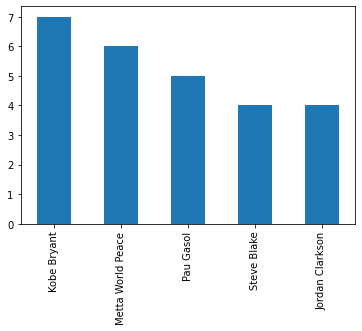

In [155]:
id_filter = players_df['TEAM_ID'] == 1610612747
season_filter = players_df['SEASON'] == 2019

players_df[id_filter]['PLAYER_NAME'].value_counts().head().plot.bar()

### Análise do jogador LeBron

In [52]:
lebron_df = games_details_df[games_details_df['PLAYER_ID']==2544]

In [60]:
lebron_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
288,22000640,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,10:36,3.0,...,0.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,10.0,-5.0
841,22000630,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,36:30,14.0,...,1.0,7.0,8.0,6.0,1.0,1.0,3.0,2.0,37.0,7.0
1309,22000615,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,31:13,8.0,...,1.0,11.0,12.0,12.0,0.0,1.0,4.0,0.0,25.0,0.0
1515,22000608,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,30:29,8.0,...,1.0,9.0,10.0,11.0,0.0,0.0,6.0,3.0,22.0,33.0
2200,22000075,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,35:41,8.0,...,1.0,10.0,11.0,10.0,2.0,0.0,4.0,0.0,26.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600600,11200095,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,29,2.0,...,0.0,4.0,4.0,8.0,2.0,1.0,2.0,2.0,10.0,NaN
601302,11200069,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,27,6.0,...,0.0,4.0,4.0,8.0,4.0,0.0,2.0,1.0,13.0,NaN
601918,11200043,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,20,5.0,...,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,11.0,NaN
602351,11200028,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,26,6.0,...,2.0,3.0,5.0,5.0,1.0,0.0,2.0,1.0,20.0,NaN


In [85]:
lebron_details = lebron_df[['PLAYER_NAME','FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']]

In [70]:
display(lebron_details.groupby(['PLAYER_NAME']).median())
display(lebron_details.groupby(['PLAYER_NAME']).mean())
display(lebron_details.groupby(['PLAYER_NAME']).max())

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,
LeBron James,10.0,19.0,0.5,1.0,4.0,0.333,5.0,8.0,0.75,1.0,6.0,7.0,7.0,1.0,1.0,3.0,2.0,27.0,6.0


,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,
LeBron James,9.722899,19.364799,0.502929,1.484775,4.322168,0.299861,5.85201,7.965895,0.715742,1.199147,6.344702,7.543849,7.22838,1.585262,0.771011,3.48173,1.884287,26.782582,5.360377


,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,
LeBron James,23.0,38.0,0.929,8.0,13.0,1.0,24.0,28.0,1.0,8.0,17.0,19.0,19.0,7.0,5.0,11.0,6.0,61.0,46.0


PLAYER_NAME
LeBron James    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

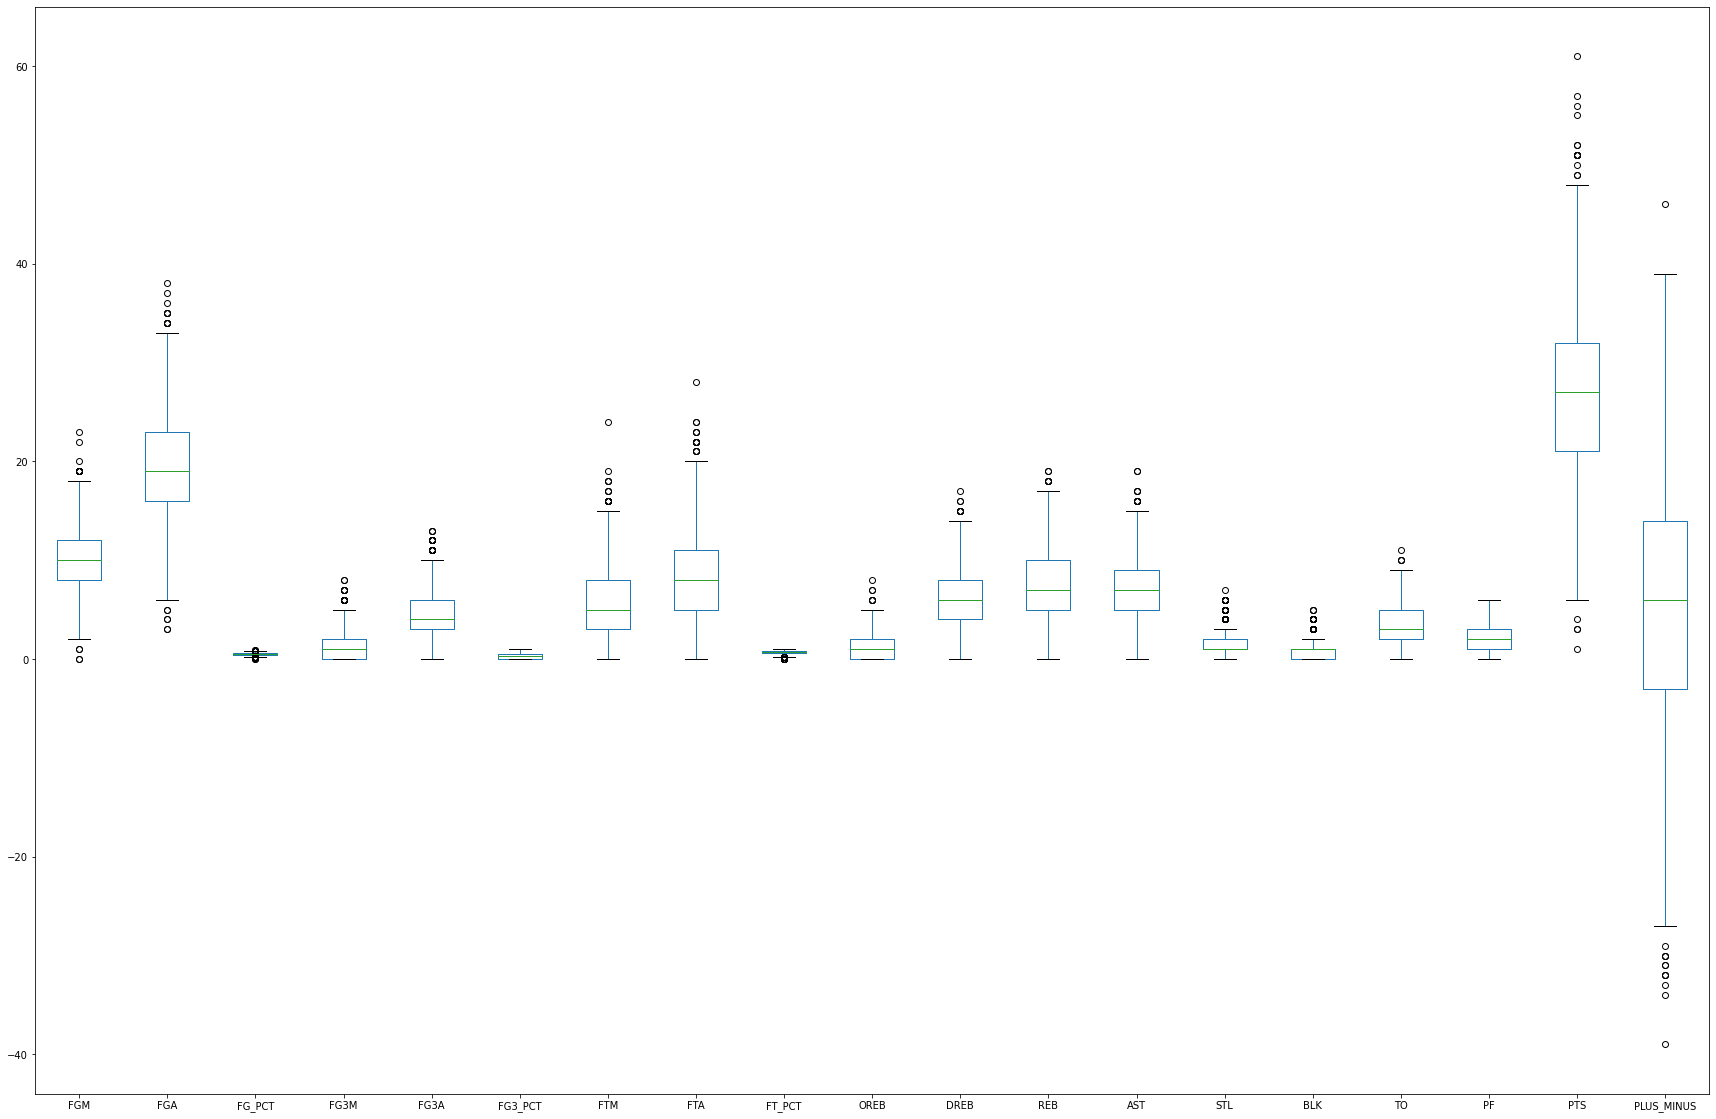

In [88]:
lebron_details.groupby(['PLAYER_NAME']).plot.box(figsize=(30,20))

<AxesSubplot:>

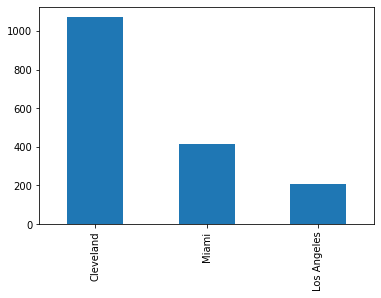

In [59]:
lebron_df['TEAM_CITY'].value_counts().plot.bar()

In [89]:
stats_cols = {
    'FGM':'Field Goals Made',
    'FGA':'Field Goals Attempted',
    'FG_PCT':'Field Goal Percentage',
    'FG3M':'Three Pointers Made',
    'FG3A':'Three Pointers Attempted',
    'FG3_PCT':'Three Point Percentage',
    'FTM':'Free Throws Made',
    'FTA':'Free Throws Attempted',
    'FT_PCT':'Free Throw Percentage',
    'OREB':'Offensive Rebounds',
    'DREB':'Defensive Rebounds',
    'REB':'Rebounds',
    'AST':'Assists',
    'TO':'Turnovers',
    'STL':'Steals',
    'BLK':'Blocked Shots',
    'PF':'Personal Foul',
    'PTS':'Points',
    'PLUS_MINUS':'Plus-Minus'
}

In [122]:
def radar_plot(ax, df, max_val=1):
    # number of variable
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    yticks = [max_val*i/4 for i in range(1,4)]
    plt.yticks(yticks, [str(e) for e in yticks], color="grey", size=10)
    plt.ylim(0,max_val)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    colors = ['b','r','g']
    for i in range(len(df)):
        values = df.values[i].flatten().tolist()
        values += values[:1]
        color = colors[i]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color, label=df.index[i])

        # Fill area
        ax.fill(angles, values, color, alpha=0.1)
     
    # Add legend
    plt.legend(loc=0, bbox_to_anchor=(0.1, 0.1), prop={'size': 13})

In [129]:
def get_players_stats(player_one, player_two):
    # Remove players that didn't played at a game
    df_tmp = games_details_df[~games_details_df['MIN'].isna()]
    del df_tmp['MIN']

    # Define key statistics columns, one for percentage variable and one for other important statistics
    prct_var = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
    other_var = ['REB', 'AST', 'STL', 'PF', 'BLK'] 

    # Create a specific dataset for LeBron James
    player_one_df = df_tmp[df_tmp['PLAYER_NAME'] == player_one]
    player_two_df = df_tmp[df_tmp['PLAYER_NAME'] == player_two]

    player_one_agg_prct = agg_on_columns(df=player_one_df, agg_var=prct_var, operation=['mean'])
    player_one_agg_other = agg_on_columns(df=player_one_df, agg_var=other_var, operation=['mean'])

    player_two_agg_prct = agg_on_columns(df=player_two_df, agg_var=prct_var, operation=['mean'])
    player_two_agg_other = agg_on_columns(df=player_two_df, agg_var=other_var, operation=['mean'])
    
    stats_prct = pd.concat([player_one_agg_prct, player_two_agg_prct]) 
    stats_other = pd.concat([player_one_agg_other, player_two_agg_other]) 

    stats_prct.index = [player_one, player_two]
    stats_other.index = [player_one, player_two]
    
    stats_prct = rename_df(stats_prct, col_dict=stats_cols)
    stats_other = rename_df(stats_other, col_dict=stats_cols)
    
    return stats_prct, stats_other

def show_player_stats_comparison(stats_prct, stats_other):
    fig, ax = plt.subplots(figsize=(18, 9))

    ax = plt.subplot(121, polar=True)
    ax.set_title('Percentage statistics')
    radar_plot(ax=ax, df=stats_prct, max_val=1)

    ax = plt.subplot(122, polar=True)
    ax.set_title('Others statistics')
    radar_plot(ax=ax, df=stats_other, max_val=10)

    plt.show()

In [134]:
player_one = 'LeBron James'
player_two = 'Kobe Bryant'
# Function code just hide above because it's a repeat from previous part
stats_prct, stats_other = get_players_stats(player_one=player_one, player_two=player_two)

#### Stats comparison between LeBron James and Kobe Bryant

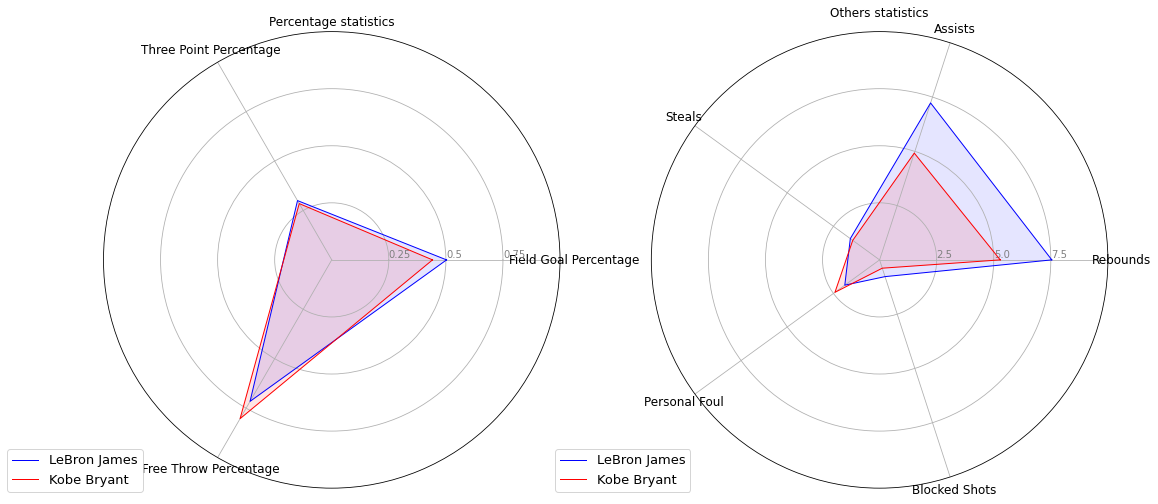

In [136]:
display(Markdown(f'#### Stats comparison between {player_one} and {player_two}'))
show_player_stats_comparison(stats_prct, stats_other)